# PIA

In [1]:
import cv2 as cv
import numpy as np 
import matplotlib.pyplot as plt 
import math

In [2]:
def convolution(img,py,px,krnl):
    sum = 0 

    imgPiece = img[py-1:py+2,px-1:px+2]
    resMat = np.multiply(imgPiece,krnl)
    sum = np.sum(resMat)
           
    if sum > 255:
        sum = 255
    elif sum < 0:
        sum = 0

    return sum   

In [3]:
def laplaceFilter(img):
    newImg = np.zeros(img.shape)
    h,w = img.shape
    krnl = [[-1,-1,-1],[-1,8,-1],[-1,-1,-1]]

    for i in range(1,h-1):
        for j in range(1,w-1):
            newImg[i][j] = convolution(img,i,j,krnl)

    return newImg


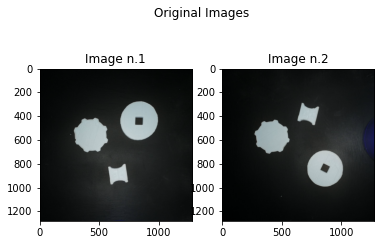

In [4]:
newImgShape = (600,600)

imgPaths = ["IMG_1.jpeg","IMG_2.jpeg"]
ogImgs = []


for path in imgPaths:
    ogImgs.append(cv.imread(path))

fig,axs = plt.subplots(math.ceil(len(imgPaths)/2),2)
fig.suptitle("Original Images")


for i in range(len(axs)):
    axs[i].set_title("Image n." + str(i+1))
    axs[i].imshow(ogImgs[i])

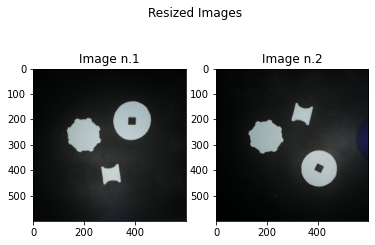

In [5]:
rsImgs = []

for img in ogImgs:
    rsImgs.append(cv.resize(img,newImgShape))

fig,axs = plt.subplots(1,len(rsImgs))
fig.suptitle("Resized Images")

for i in range(len(axs)):
    axs[i].set_title("Image n." + str(i+1))
    axs[i].imshow(rsImgs[i])

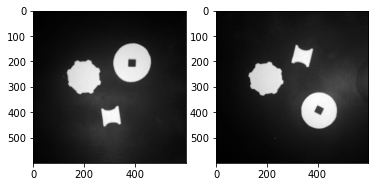

In [6]:
grayImgs = []
blurImgs = []

for img in rsImgs:
    grayImgs.append(cv.cvtColor(img,cv.COLOR_BGR2GRAY))

for img in grayImgs:
    blurImgs.append(cv.GaussianBlur(img,(5,5),0))

fig,axs = plt.subplots(1,2)

for i in range(len(blurImgs)):
    axs[i].imshow(blurImgs[i], cmap = 'gray')

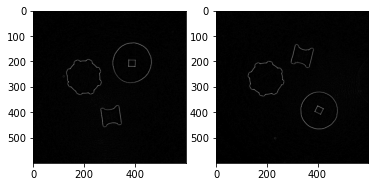

In [7]:
laplaceImgs = []

for img in blurImgs:
    #laplaceImgs.append(laplaceFilter(img))
    laplaceImgs.append(cv.Laplacian(img,None,1))

fig,axs = plt.subplots(1,2)

for i in range(len(laplaceImgs)):
    axs[i].imshow(laplaceImgs[i], cmap = 'gray')

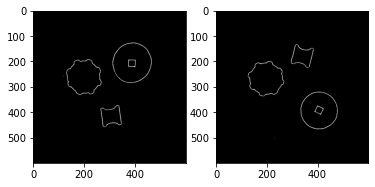

In [9]:
treshold = 10

binaryImgs = []


for i in range(len(laplaceImgs)):
    ret,thresh = cv.threshold(laplaceImgs[i],treshold,255,cv.THRESH_BINARY)
    binaryImgs.append(thresh)

fig, axs = plt.subplots(1,2)

for i in range(len(binaryImgs)):
    axs[i].imshow(binaryImgs[i],cmap = 'gray')

[388 208  77]
[404 396  72]


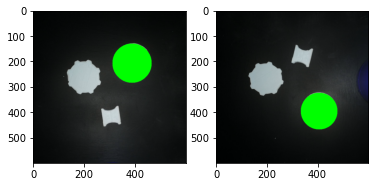

In [18]:
circles = []
imgs = rsImgs

for img in binaryImgs:
    circles.append(cv.HoughCircles(img,cv.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0))
            
circles = np.uint16(np.around(circles))

for i in range(len(circles)):
    for circle in circles[i][0]:
        print(circle)
        cv.circle(imgs[i],(circle[0],circle[1]),circle[2],(0,255,0),-1)

fig,axs = plt.subplots(1,2)

for i in range(len(axs)):
    axs[i].imshow(imgs[i])